<a href="https://colab.research.google.com/github/rahh03/EDA_21BDS0168/blob/main/EDA_TH_RAHUL_KUMAR_21BDS0168.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis TH | Digital Assessment I **

### RAHUL KUMAR **21BDS0168**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Loading the dataset from the CSV file
happiness_data = pd.read_csv("happiness.csv")

In [ ]:
# Display basic information about the dataset
print(happiness_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17137 entries, 0 to 17136
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     17137 non-null  int64  
 1   year         17137 non-null  int64  
 2   workstat     17134 non-null  object 
 3   prestige     16283 non-null  float64
 4   divorce      17137 non-null  object 
 5   widowed      17137 non-null  object 
 6   educ         17093 non-null  float64
 7   reg16        17137 non-null  object 
 8   babies       17036 non-null  float64
 9   preteen      17036 non-null  float64
 10  teens        17049 non-null  float64
 11  income       17137 non-null  object 
 12  region       17137 non-null  object 
 13  attend       16864 non-null  object 
 14  happy        17137 non-null  object 
 15  owngun       17137 non-null  object 
 16  tvhours      11794 non-null  float64
 17  vhappy       17137 non-null  int64  
 18  mothfath16   17132 non-null  float64
 19  blac

In [ ]:
# Display the first few rows
print(happiness_data.head())

   rownames  year          workstat  prestige divorce widowed  educ  \
0         1  1994     keeping house      46.0      no     iap  12.0   
1         2  1994  working fulltime      22.0      no     iap  12.0   
2         3  1994  working fulltime      29.0      no     iap  12.0   
3         4  1994  working fulltime      42.0     yes     iap   8.0   
4         5  1994  working parttime      36.0      no     iap  13.0   

             reg16  babies  preteen  ...  occattend regattend y94 y96 y98 y00  \
0  middle atlantic     2.0      3.0  ...        1.0       0.0   1   0   0   0   
1          foreign     0.0      0.0  ...        0.0       0.0   1   0   0   0   
2          foreign     0.0      0.0  ...        0.0       1.0   1   0   0   0   
3          foreign     0.0      0.0  ...        0.0       0.0   1   0   0   0   
4  middle atlantic     0.0      1.0  ...        0.0       0.0   1   0   0   0   

   y02  y04  y06  unem10  
0    0    0    0     1.0  
1    0    0    0     0.0  
2    

In [ ]:
# Display the first few rows
print(happiness_data.head())

# Display summary statistics
print(happiness_data.describe())

# Check for missing values
print(happiness_data.isnull().sum())

# Display unique values in each column
for column in happiness_data.columns:
    print(f"\nUnique values in {column}:")
    print(happiness_data[column].value_counts())

   rownames  year          workstat  prestige divorce widowed  educ  \
0         1  1994     keeping house      46.0      no     iap  12.0   
1         2  1994  working fulltime      22.0      no     iap  12.0   
2         3  1994  working fulltime      29.0      no     iap  12.0   
3         4  1994  working fulltime      42.0     yes     iap   8.0   
4         5  1994  working parttime      36.0      no     iap  13.0   

             reg16  babies  preteen  ...  occattend regattend y94 y96 y98 y00  \
0  middle atlantic     2.0      3.0  ...        1.0       0.0   1   0   0   0   
1          foreign     0.0      0.0  ...        0.0       0.0   1   0   0   0   
2          foreign     0.0      0.0  ...        0.0       1.0   1   0   0   0   
3          foreign     0.0      0.0  ...        0.0       0.0   1   0   0   0   
4  middle atlantic     0.0      1.0  ...        0.0       0.0   1   0   0   0   

   y02  y04  y06  unem10  
0    0    0    0     1.0  
1    0    0    0     0.0  
2    

In [ ]:
# Let's fill missing values in some of the categorical columns with mode (most frequent value).
for column in ['divorce', 'widowed', 'income', 'region', 'owngun']:
    happiness_data[column].fillna(happiness_data[column].mode()[0], inplace=True)


In [ ]:
# Filling numerical columns with median (more robust to outliers)
for column in ['prestige', 'educ', 'babies', 'preteen', 'teens', 'tvhours']:
    happiness_data[column].fillna(happiness_data[column].median(), inplace=True)

In [ ]:
# Check if missing values are properly handled now
missing_data_after_transformation = happiness_data.isnull().sum()

In [ ]:
print(happiness_data.isnull().sum())

rownames           0
year               0
workstat           3
prestige           0
divorce            0
widowed            0
educ               0
reg16              0
babies             0
preteen            0
teens              0
income             0
region             0
attend           273
happy              0
owngun             0
tvhours            0
vhappy             0
mothfath16         5
black              0
gwbush04       15207
female             0
blackfemale        0
gwbush00       13701
occattend        273
regattend        273
y94                0
y96                0
y98                0
y00                0
y02                0
y04                0
y06                0
unem10          5796
dtype: int64


In [ ]:
# Dropping columns with excessive missing data
happiness_data_cleaned = happiness_data.drop(columns=['gwbush04', 'gwbush00', 'unem10'])

# Filling missing categorical data with the mode (most frequent value)
happiness_data_cleaned['workstat'].fillna(happiness_data_cleaned['workstat'].mode()[0], inplace=True)
happiness_data_cleaned['attend'].fillna(happiness_data_cleaned['attend'].mode()[0], inplace=True)
happiness_data_cleaned['occattend'].fillna(happiness_data_cleaned['occattend'].mode()[0], inplace=True)
happiness_data_cleaned['regattend'].fillna(happiness_data_cleaned['regattend'].mode()[0], inplace=True)
happiness_data_cleaned['mothfath16'].fillna(happiness_data_cleaned['mothfath16'].mode()[0], inplace=True)

In [ ]:
# Verifying that there are no missing values left
print(happiness_data_cleaned.isnull().sum())

rownames       0
year           0
workstat       0
prestige       0
divorce        0
widowed        0
educ           0
reg16          0
babies         0
preteen        0
teens          0
income         0
region         0
attend         0
happy          0
owngun         0
tvhours        0
vhappy         0
mothfath16     0
black          0
female         0
blackfemale    0
occattend      0
regattend      0
y94            0
y96            0
y98            0
y00            0
y02            0
y04            0
y06            0
dtype: int64


In [ ]:
# Discretization: Binning the "tvhours" column into categories: Low, Medium, and High TV watching
bins = [0, 5, 10, 24]
labels = ['Low', 'Medium', 'High']
happiness_data['tvhours_binned'] = pd.cut(happiness_data['tvhours'], bins=bins, labels=labels)

In [ ]:
# Review the updated dataset structure
missing_data_after_transformation, happiness_data.head()

(rownames           0
 year               0
 workstat           3
 prestige           0
 divorce            0
 widowed            0
 educ               0
 reg16              0
 babies             0
 preteen            0
 teens              0
 income             0
 region             0
 attend           273
 happy              0
 owngun             0
 tvhours            0
 vhappy             0
 mothfath16         5
 black              0
 gwbush04       15207
 female             0
 blackfemale        0
 gwbush00       13701
 occattend        273
 regattend        273
 y94                0
 y96                0
 y98                0
 y00                0
 y02                0
 y04                0
 y06                0
 unem10          5796
 dtype: int64,
    rownames  year          workstat  prestige divorce widowed  educ  \
 0         1  1994     keeping house      46.0      no     iap  12.0   
 1         2  1994  working fulltime      22.0      no     iap  12.0   
 2         3  1994  w

# MODULE 3 : CORRELATION AND ANALYSIS

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

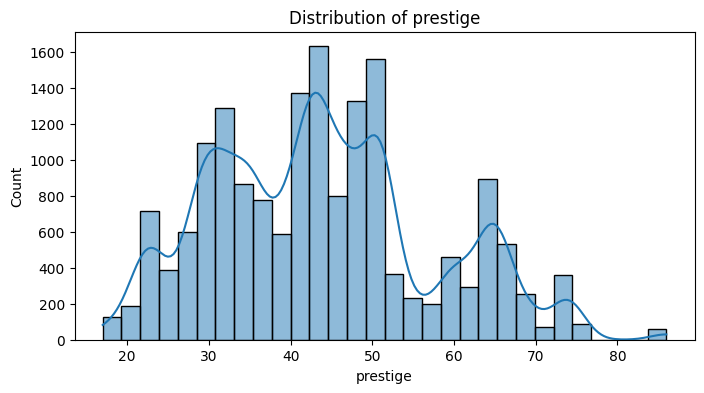

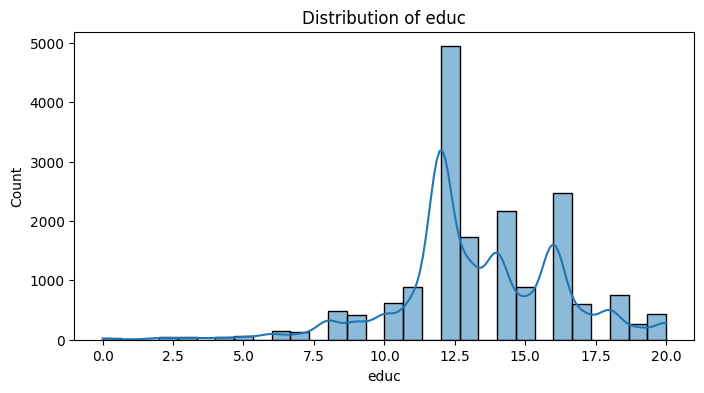

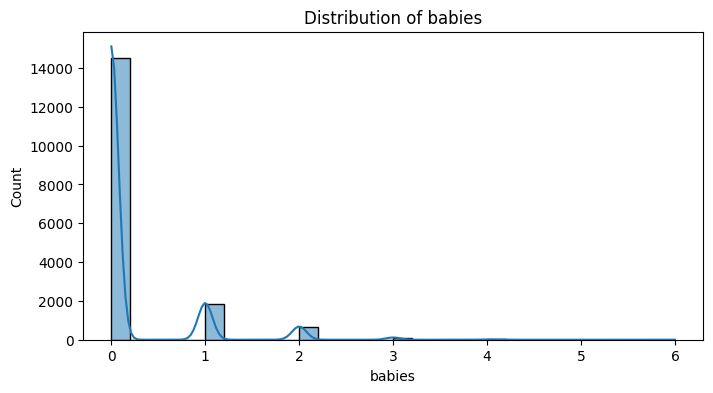

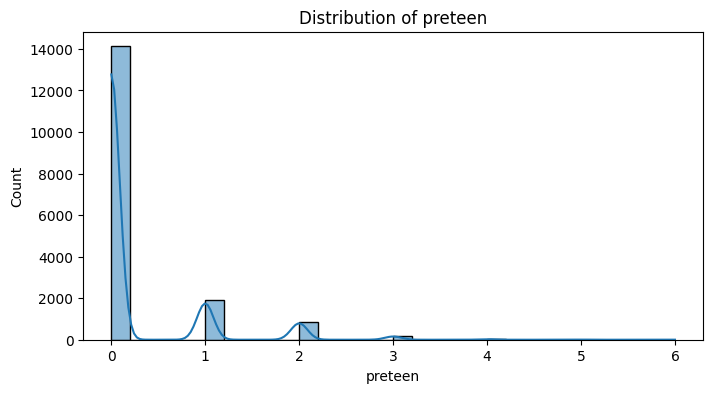

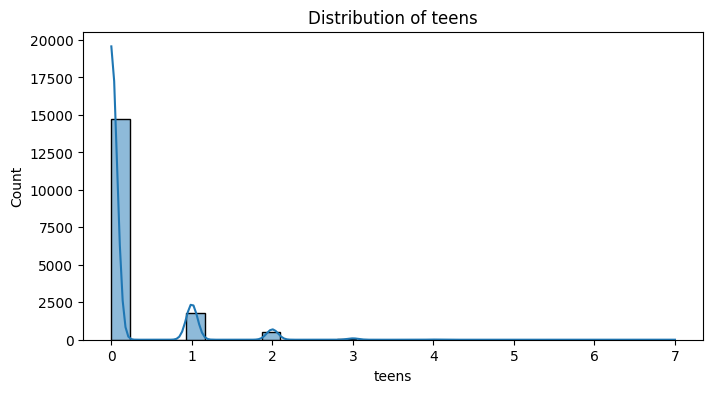

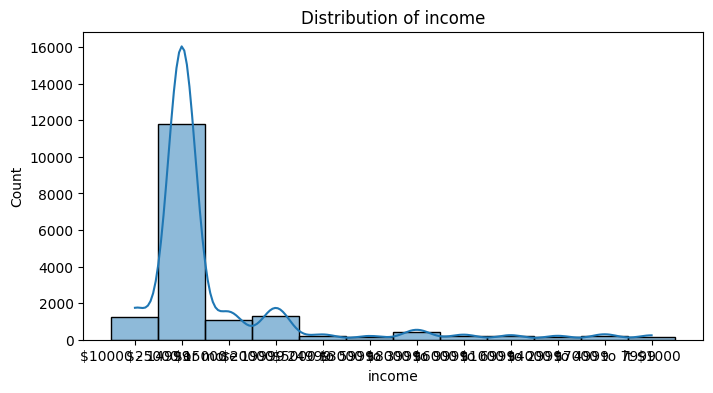

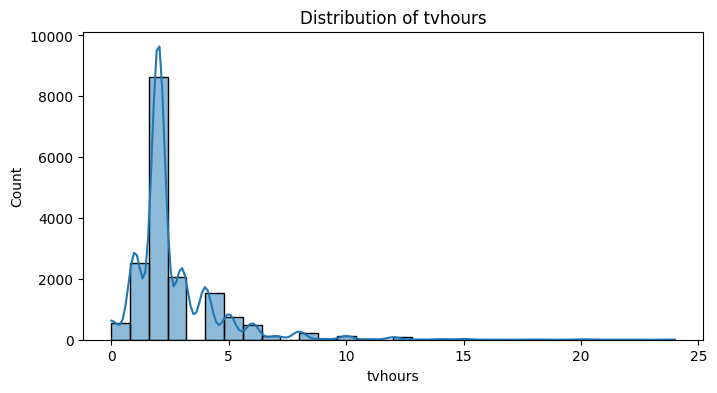

In [ ]:
# 1. Univariate Analysis
# Visualizing the distribution of key numerical columns
numerical_columns = ['prestige', 'educ', 'babies', 'preteen', 'teens', 'income', 'tvhours']
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(happiness_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# 2. Bivariate Analysis
# Visualizing the correlation matrix between numerical variables
numerical_data = happiness_data_cleaned.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Correlation analysis
numeric_columns = happiness_data.select_dtypes(include=[np.number]).columns
correlation_matrix = happiness_data[numeric_columns].corr()

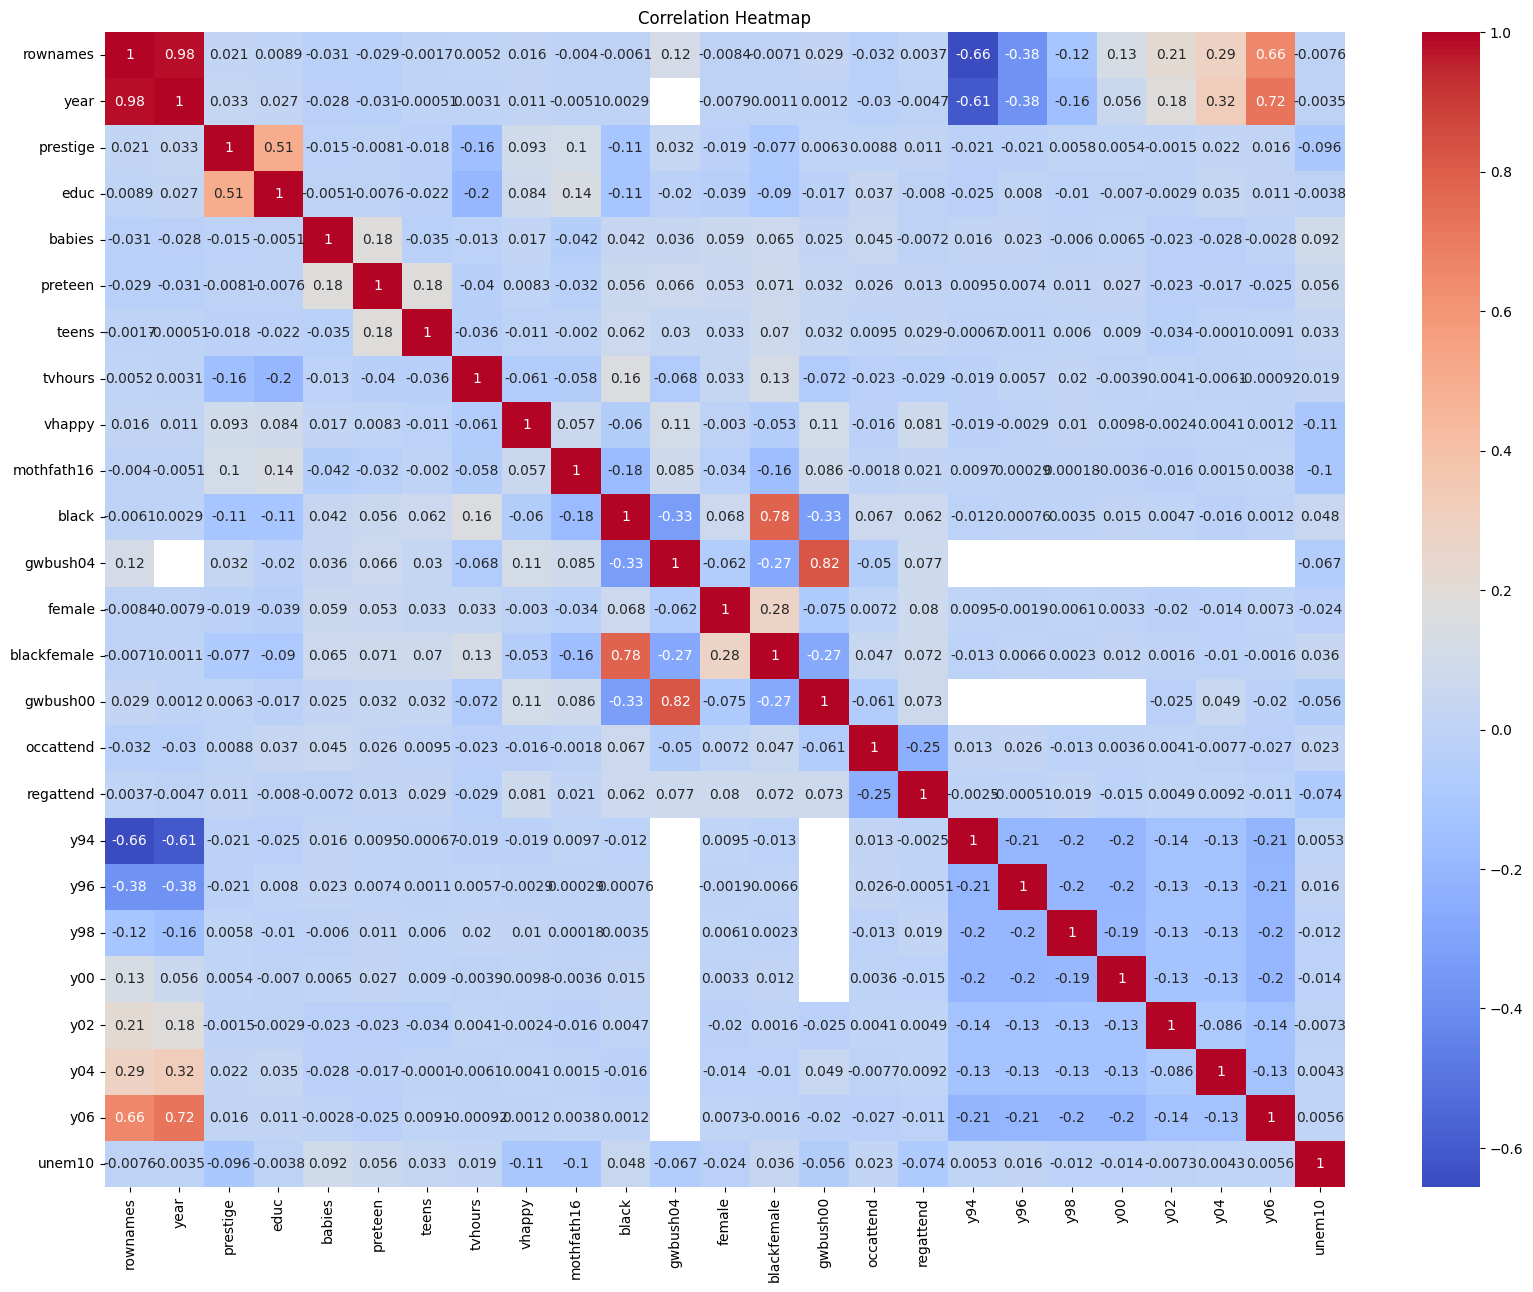

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

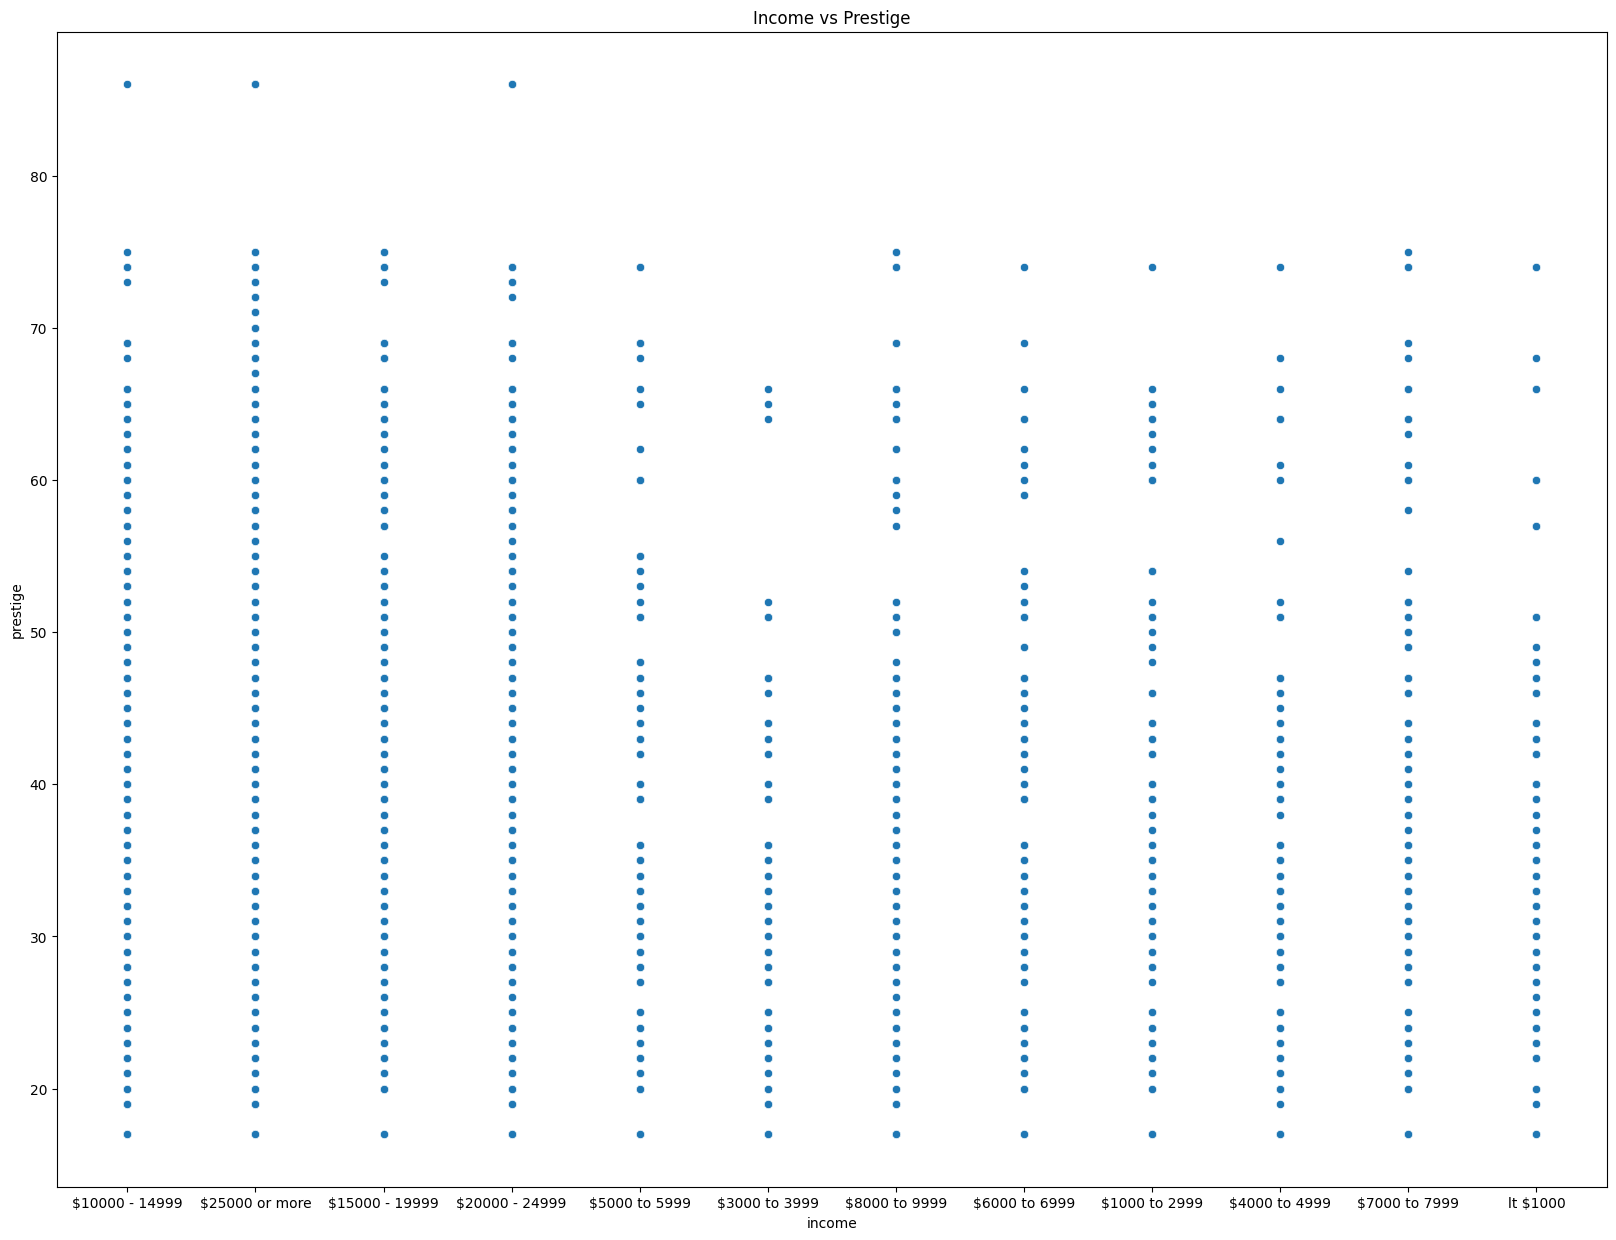

In [ ]:
# Scatter plot for two variables: income vs. prestige
plt.figure(figsize=(20,15))
sns.scatterplot(data=happiness_data, x='income', y='prestige')
plt.title('Income vs Prestige')
plt.show()

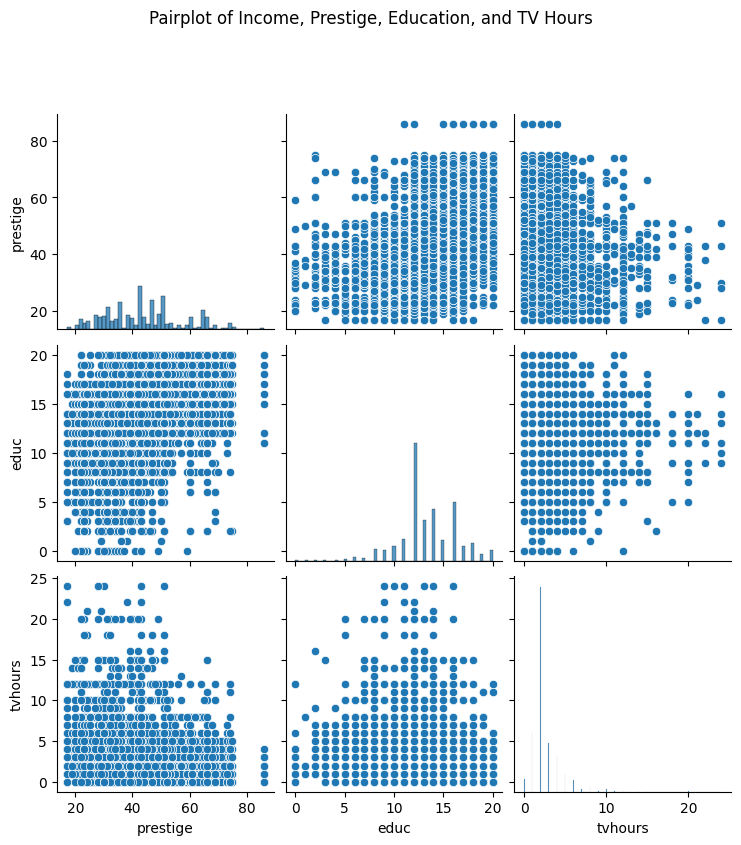

In [ ]:
# 3. Multivariate Analysis
# Pairplot for multiple variables to explore relationships between them
sns.pairplot(happiness_data[['income', 'prestige', 'educ', 'tvhours']])
plt.suptitle('Pairplot of Income, Prestige, Education, and TV Hours', y=1.12)
plt.show()

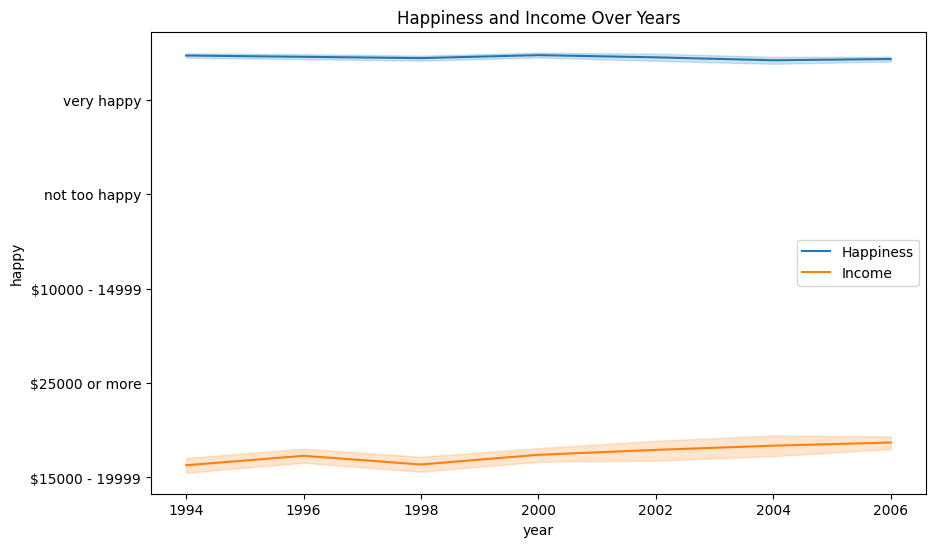

In [ ]:
# 4. Time Series Analysis
# Analyzing how happiness and income have changed over different years
plt.figure(figsize=(10,6))
sns.lineplot(data=happiness_data, x='year', y='happy', label='Happiness')
sns.lineplot(data=happiness_data, x='year', y='income', label='Income')
plt.title('Happiness and Income Over Years')
plt.legend()
plt.show()

In [ ]:
# Time Series Analysis (assuming 'y94', 'y96', etc. represent years)
years = ['y94', 'y96', 'y98', 'y00', 'y02', 'y04', 'y06']
time_series_data = happiness_data[years].sum()

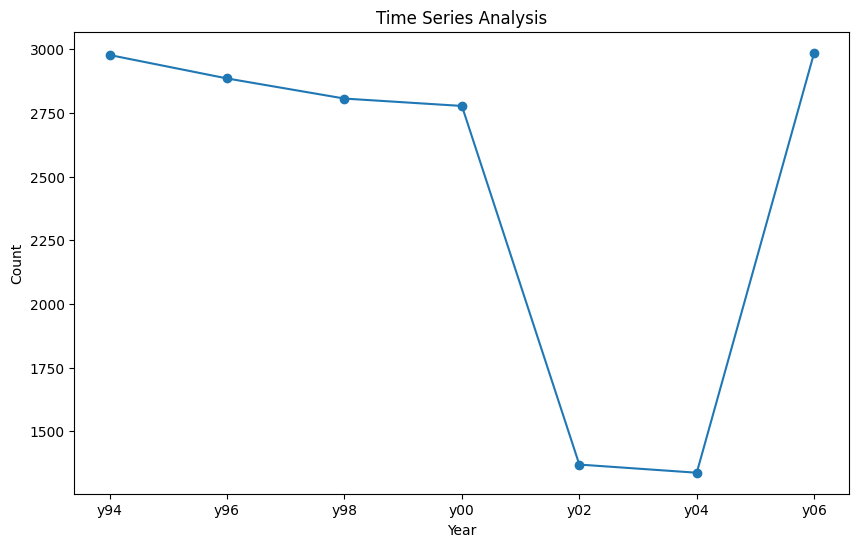

In [ ]:
plt.figure(figsize=(10, 6))
time_series_data.plot(kind='line', marker='o')
plt.title('Time Series Analysis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()